In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df= pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.shape

(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  Fals

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [10]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [12]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)
data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [13]:
df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1
5,0,3,0,14,0,0,9,1
6,1,3,1,30,0,0,7,0
7,0,2,0,26,1,1,29,1
8,1,3,1,18,0,0,7,2
9,0,3,0,21,2,0,24,1


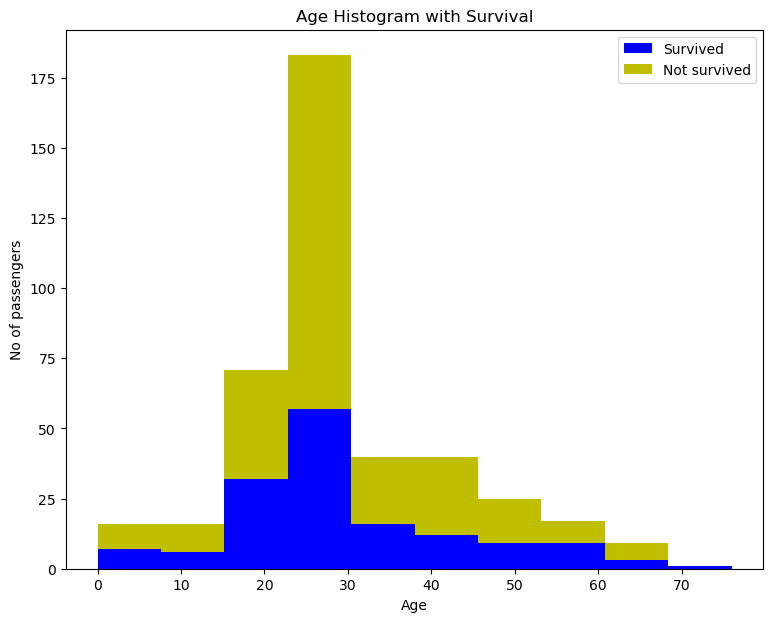

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(9, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['b','y'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

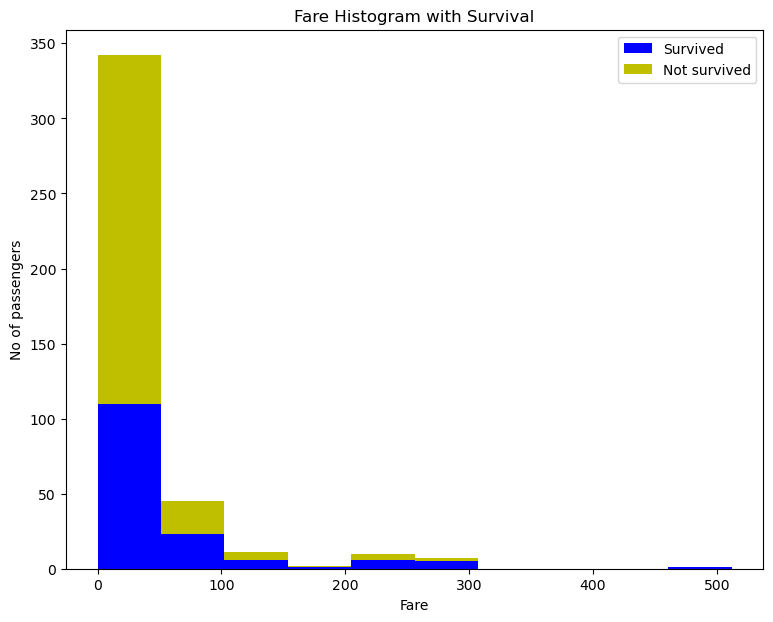

In [18]:
fig = plt.figure(figsize =(9, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['b','y'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

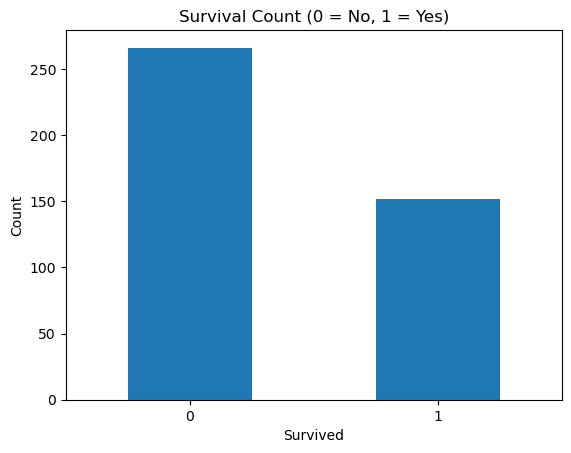

In [19]:
column = 'Survived'

survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

plt.show()

In [20]:
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

In [22]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
337,3,0,39,0,2,7,2
224,1,1,53,0,0,27,2
376,3,1,22,2,0,8,1
312,3,0,30,0,0,7,1
165,3,1,26,1,1,22,1
...,...,...,...,...,...,...,...
255,3,0,30,0,0,7,1
72,3,1,29,0,0,7,1
396,3,0,24,0,0,7,0
235,3,0,20,0,0,7,1


In [23]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
358,3,0,30,0,0,7,0
164,2,0,41,0,0,13,1
17,3,0,21,0,0,7,2
67,1,0,47,0,0,42,1
4,3,1,22,1,1,12,1
...,...,...,...,...,...,...,...
327,1,0,46,0,0,79,2
407,1,0,50,1,1,211,2
325,3,0,23,0,0,7,1
81,1,0,67,1,0,221,1


In [24]:
y_train

337    3
224    1
376    3
312    3
165    3
      ..
255    3
72     3
396    3
235    3
37     3
Name: Pclass, Length: 334, dtype: int64

In [25]:
y_test

358    3
164    2
17     3
67     1
4      3
      ..
327    1
407    1
325    3
81     1
277    2
Name: Pclass, Length: 84, dtype: int64

In [26]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 92.86%
